<a href="https://colab.research.google.com/github/Mercymerine/linear_regression_model/blob/main/life_expectancy_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the necessary Packages**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## **Getting the datasets**

In [ ]:
life = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
life.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [ ]:
life['Year'].value_counts()

Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64

In [ ]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## **Data Cleaning**

In [ ]:
#Converting column year to date
life['Year'] = pd.to_datetime(life['Year'], format='%Y')

In [ ]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Country                          2938 non-null   object        
 1   Year                             2938 non-null   datetime64[ns]
 2   Status                           2938 non-null   object        
 3   Life expectancy                  2928 non-null   float64       
 4   Adult Mortality                  2928 non-null   float64       
 5   infant deaths                    2938 non-null   int64         
 6   Alcohol                          2744 non-null   float64       
 7   percentage expenditure           2938 non-null   float64       
 8   Hepatitis B                      2385 non-null   float64       
 9   Measles                          2938 non-null   int64         
 10   BMI                             2904 non-null   float64    

In [ ]:
#Checking for missing values
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#Percentage of missing values
percentage =(life.isnull().sum()/len(life))*100
percentage

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [ ]:
#Dealing with missing values
import missingno as msno

<Axes: >

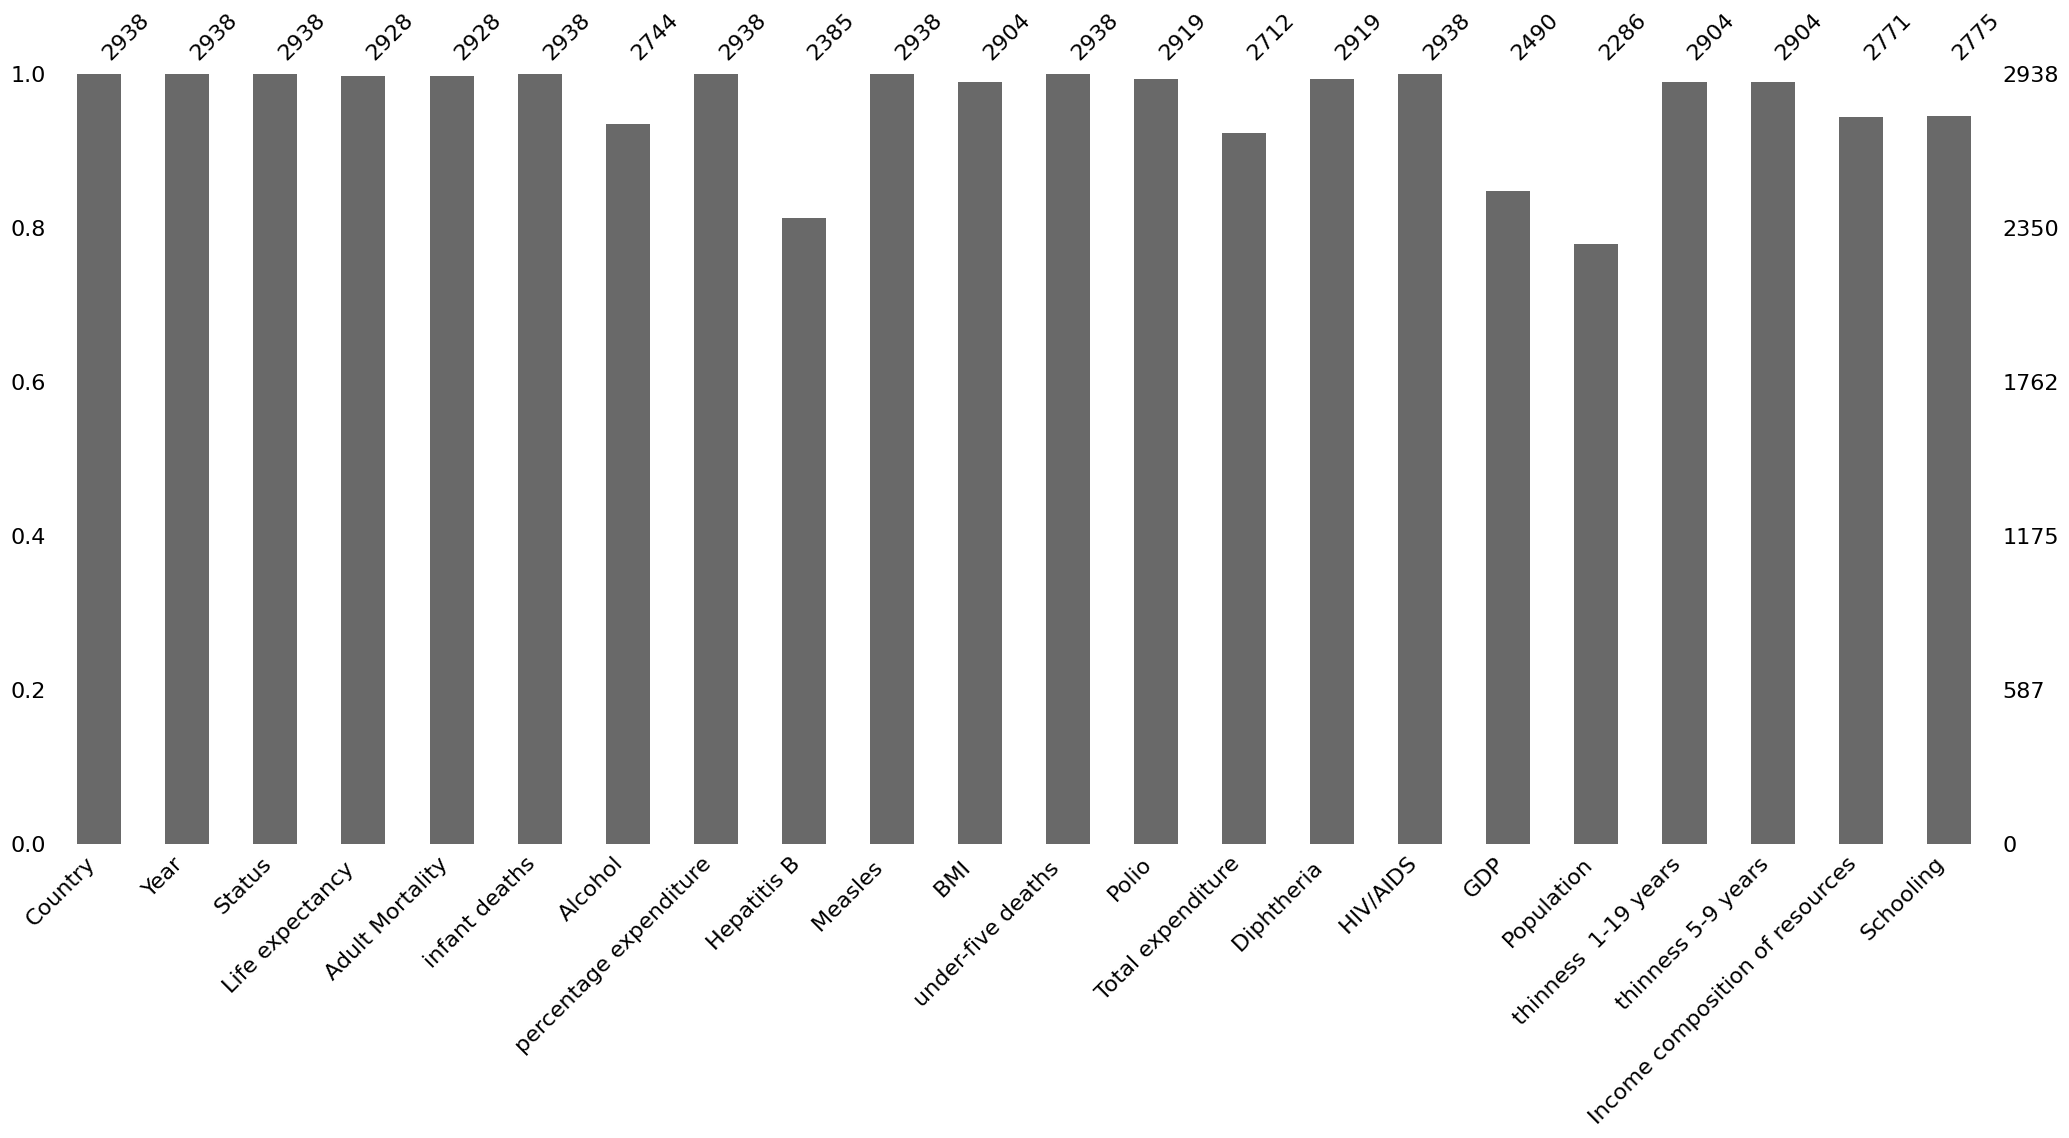

In [ ]:
#Barplot
msno.bar(life)

<Axes: >

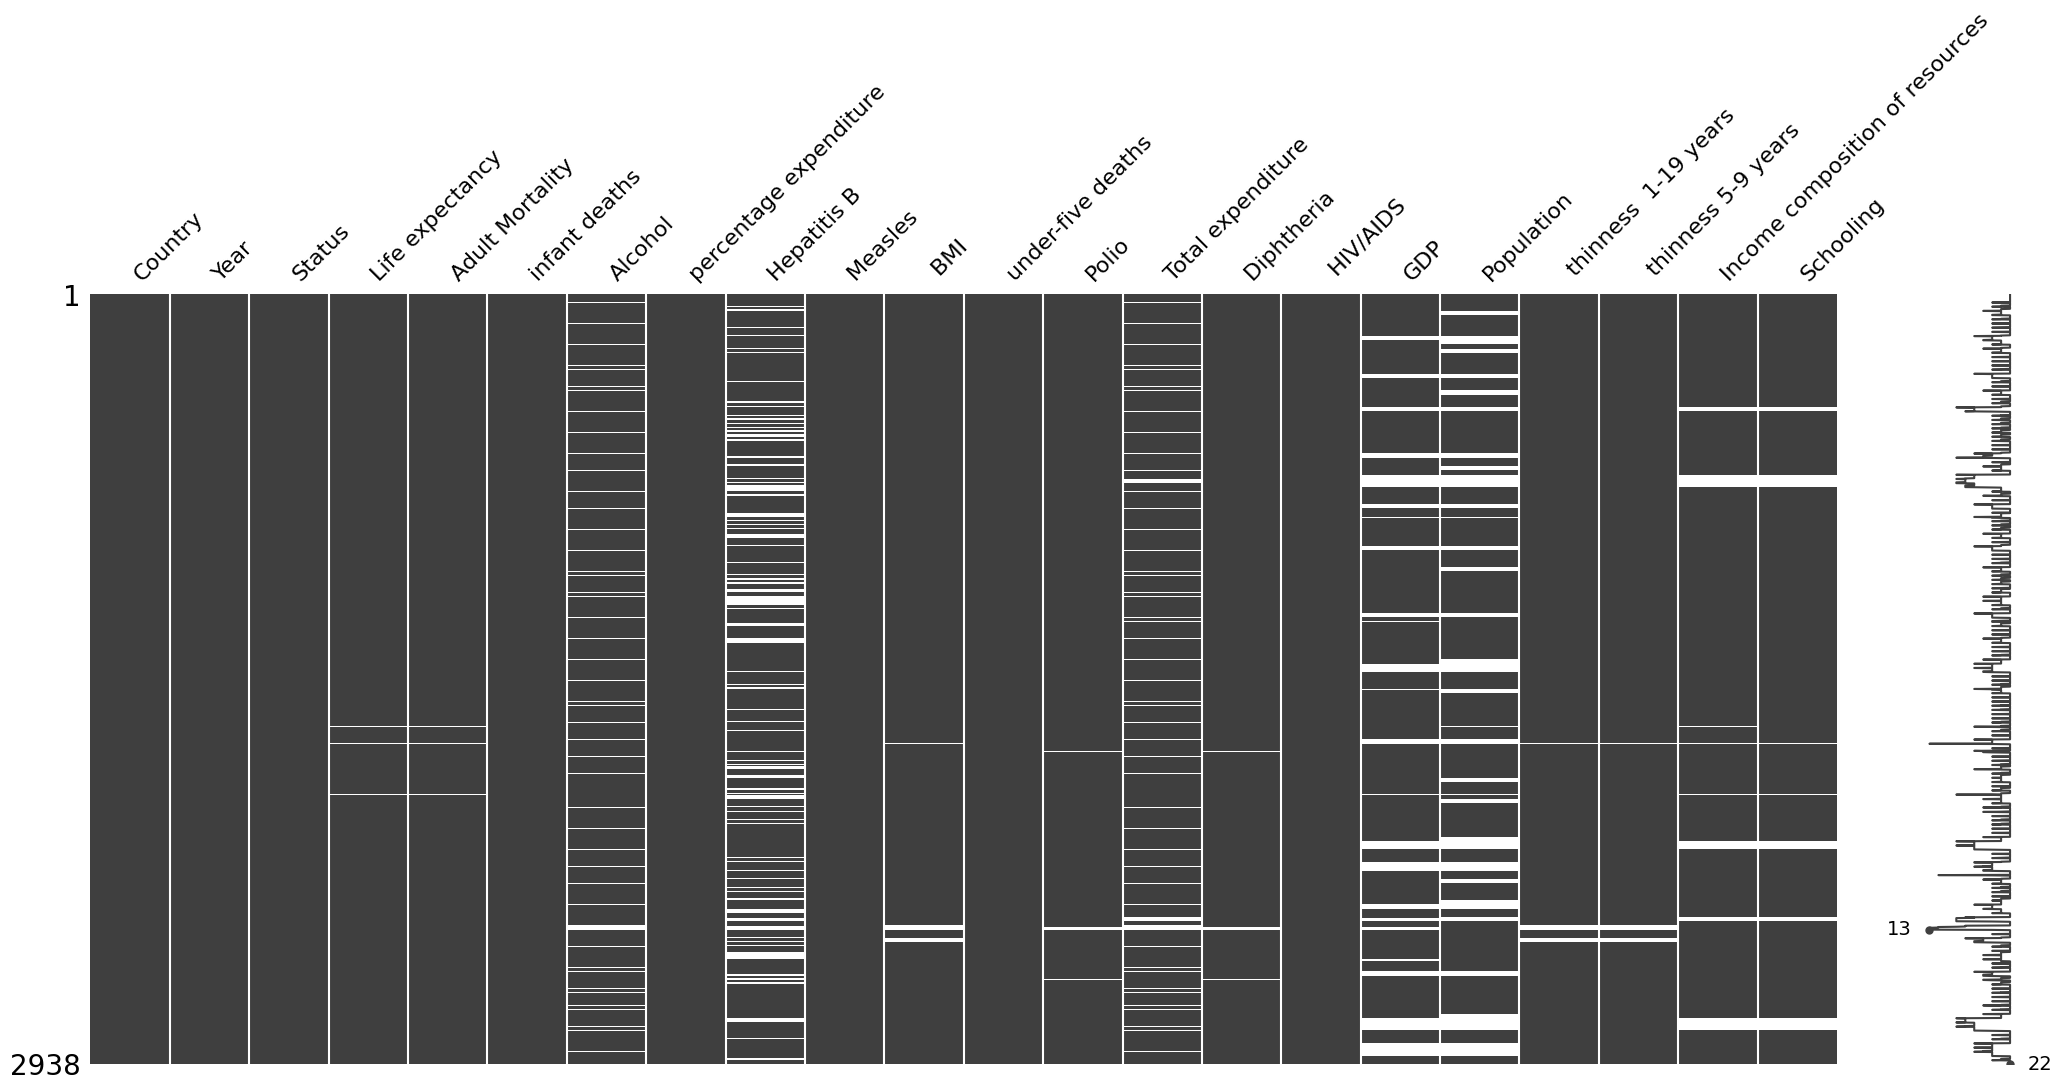

In [ ]:
msno.matrix(life)

<Axes: >

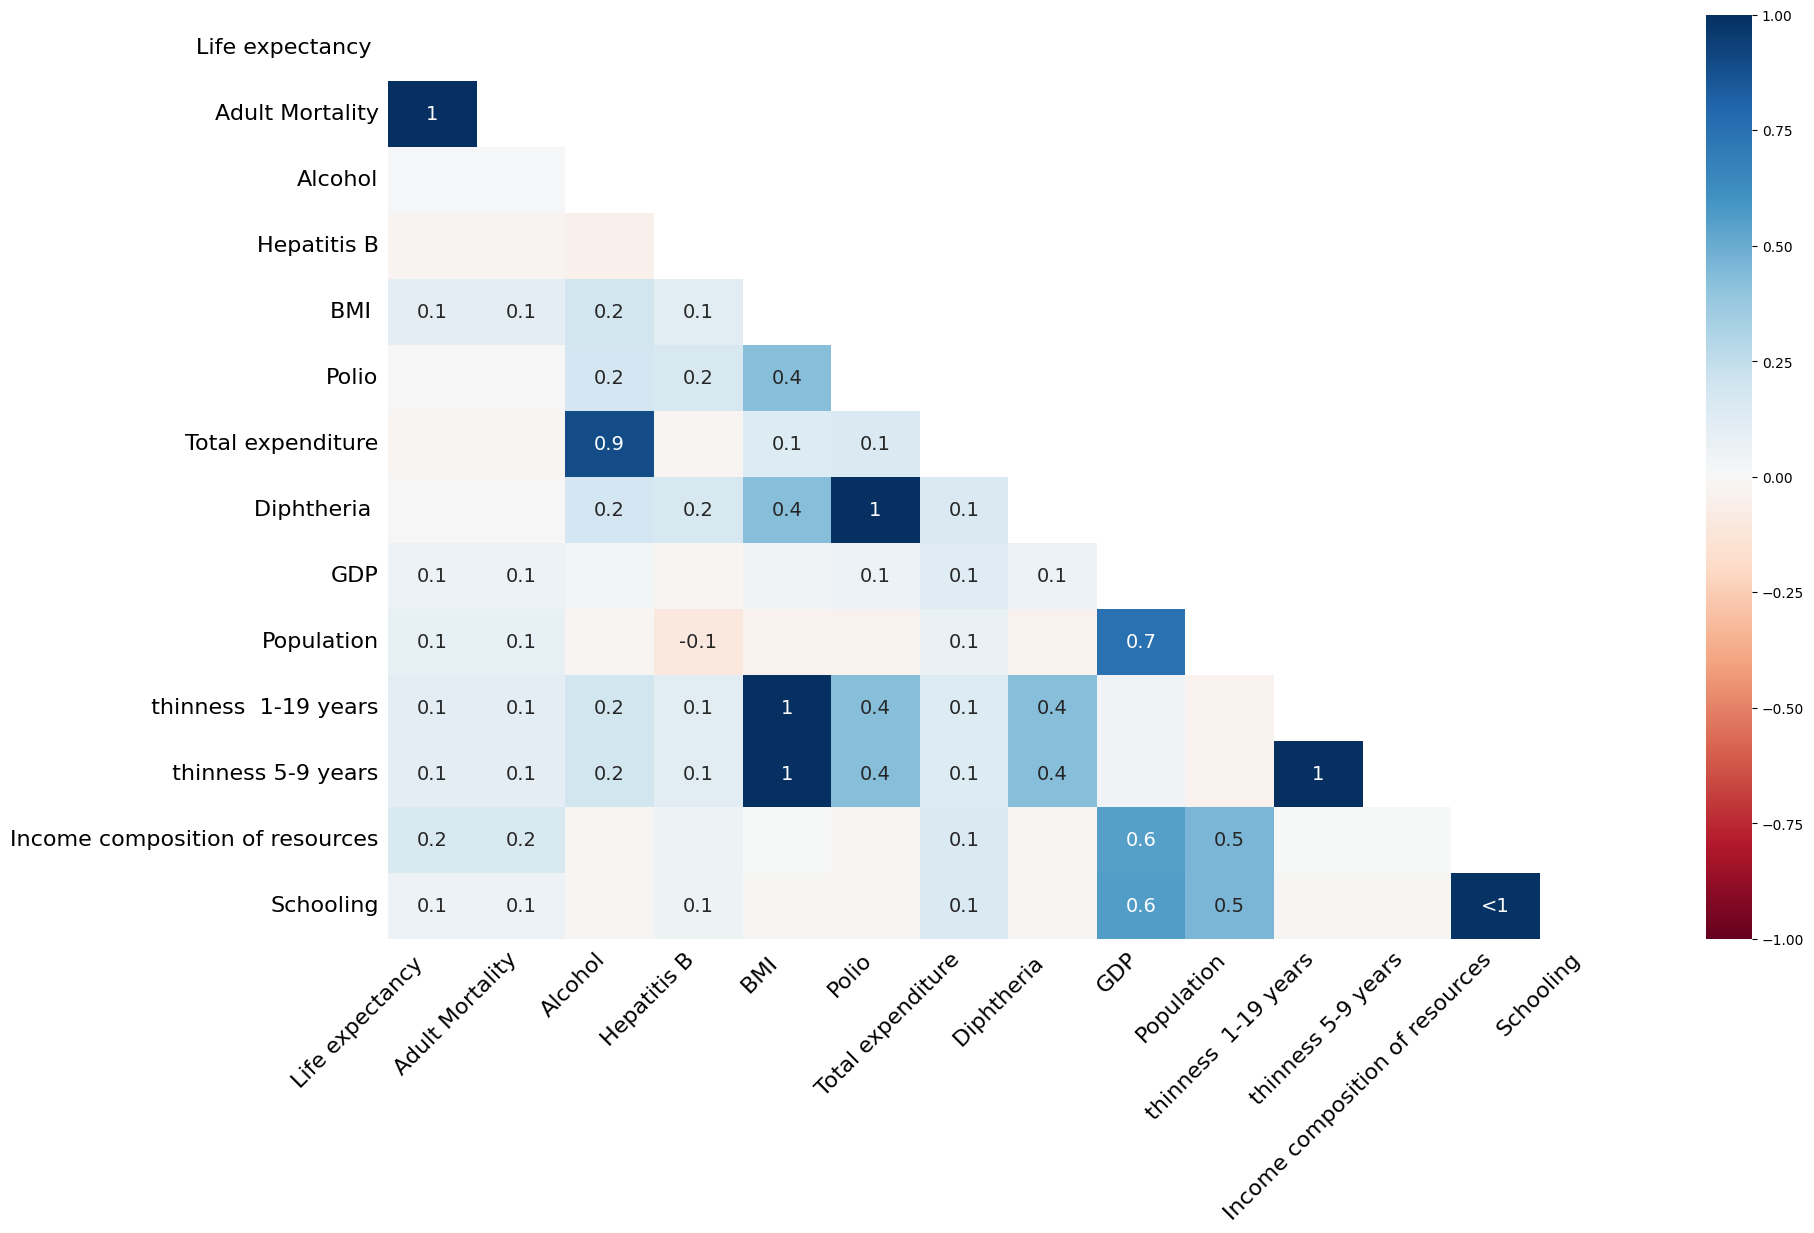

In [ ]:
msno.heatmap(life)

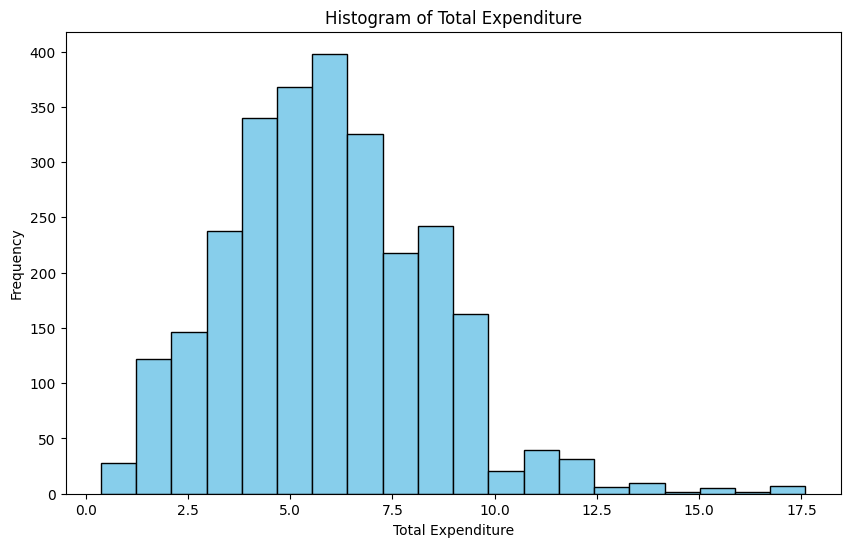

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Total expenditure'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Total Expenditure')
plt.xlabel('Total Expenditure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

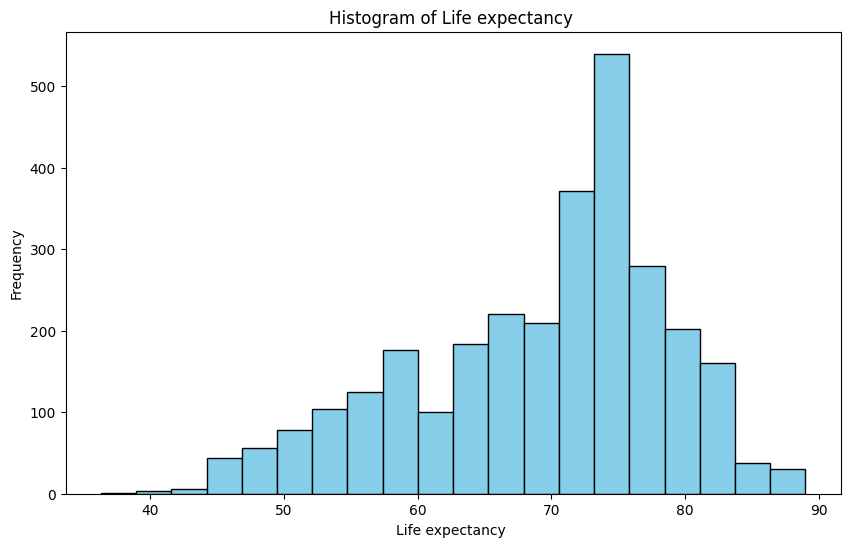

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Life expectancy '].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Life expectancy ')
plt.xlabel('Life expectancy ')
plt.ylabel('Frequency')
plt.show()

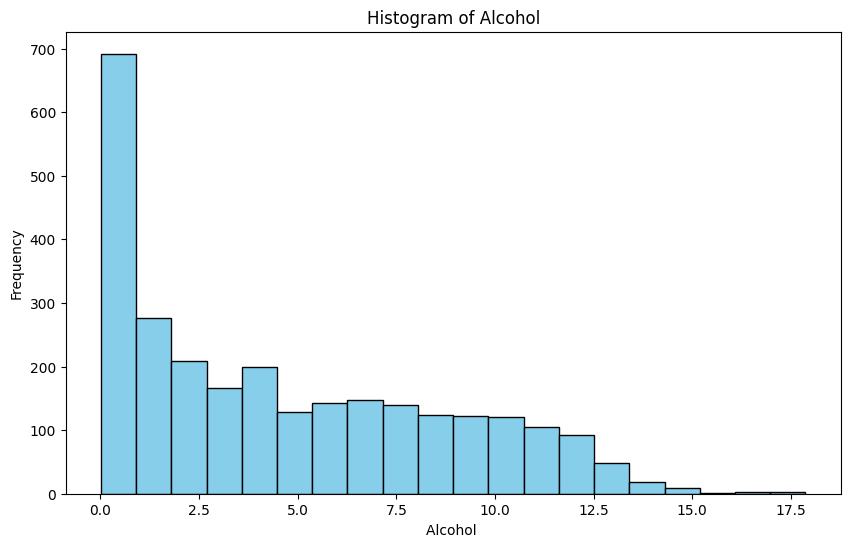

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Alcohol'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Alcohol')
plt.xlabel('Alcohol ')
plt.ylabel('Frequency')
plt.show()

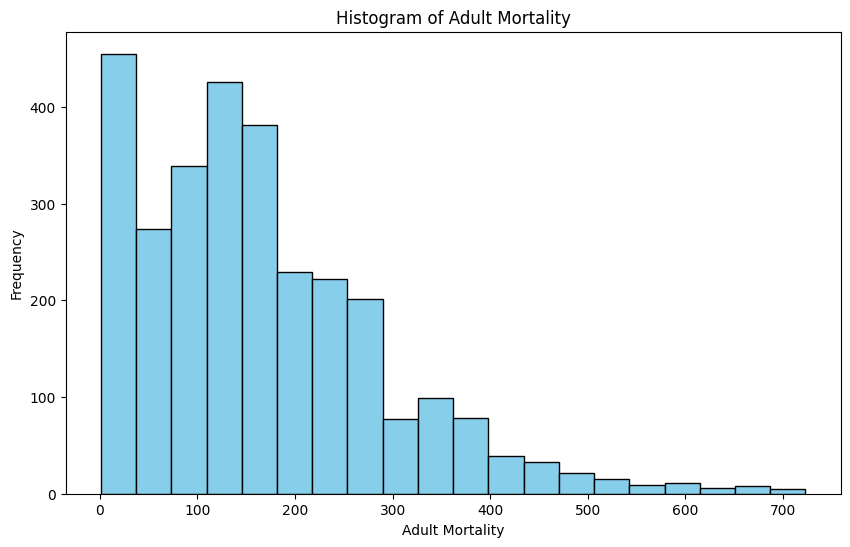

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Adult Mortality'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Adult Mortality')
plt.xlabel('Adult Mortality')
plt.ylabel('Frequency')
plt.show()

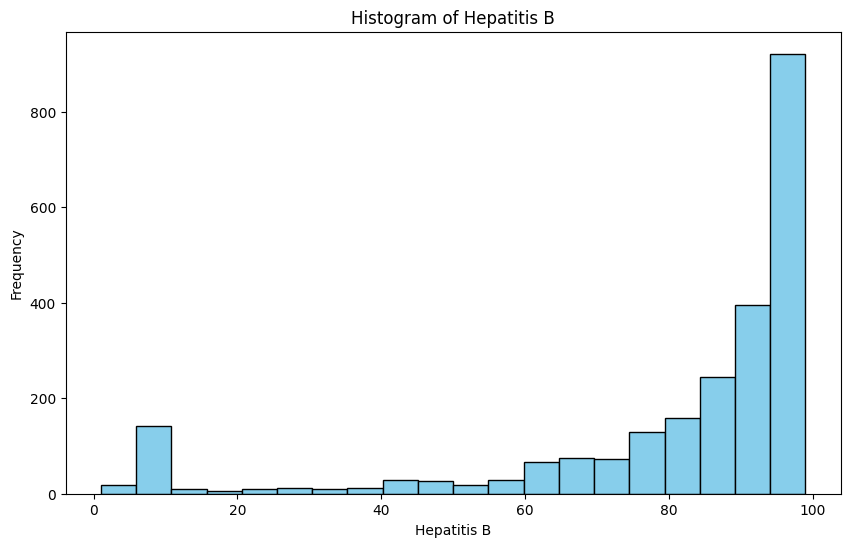

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Hepatitis B'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Hepatitis B')
plt.xlabel('Hepatitis B')
plt.ylabel('Frequency')
plt.show()

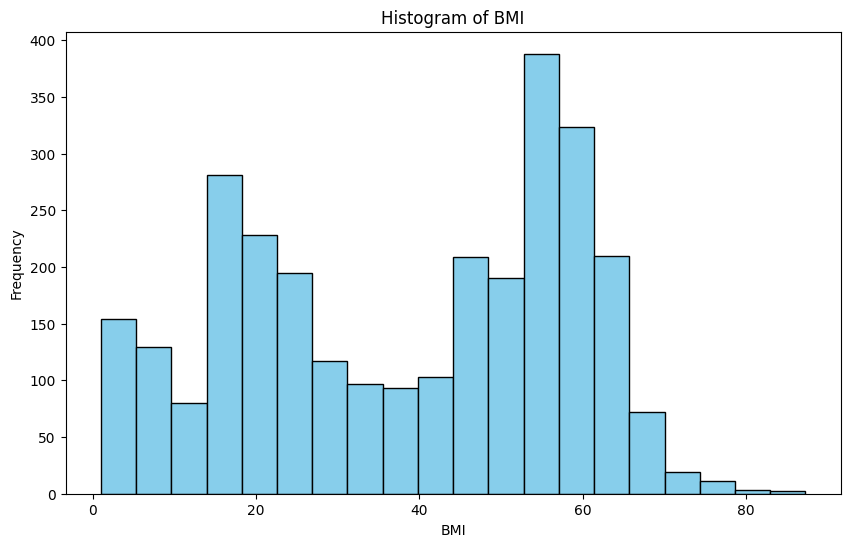

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life[' BMI '].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

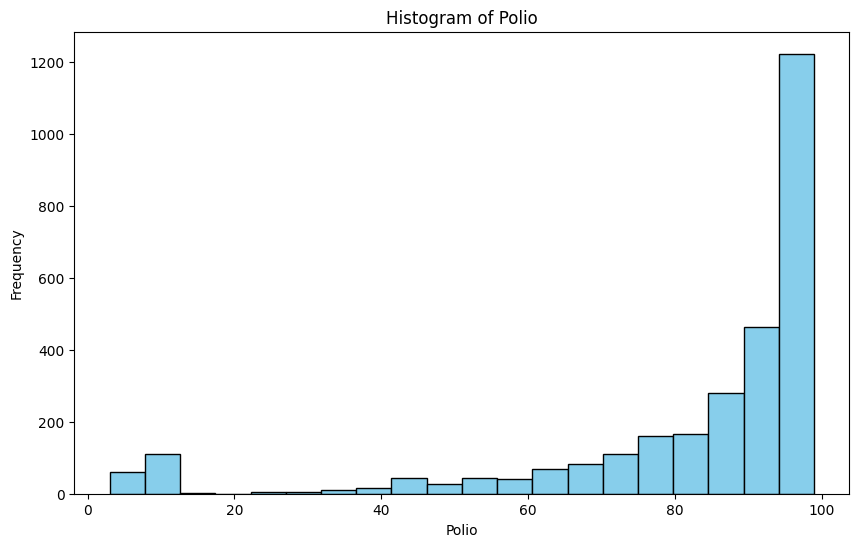

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Polio'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Polio')
plt.xlabel('Polio')
plt.ylabel('Frequency')
plt.show()

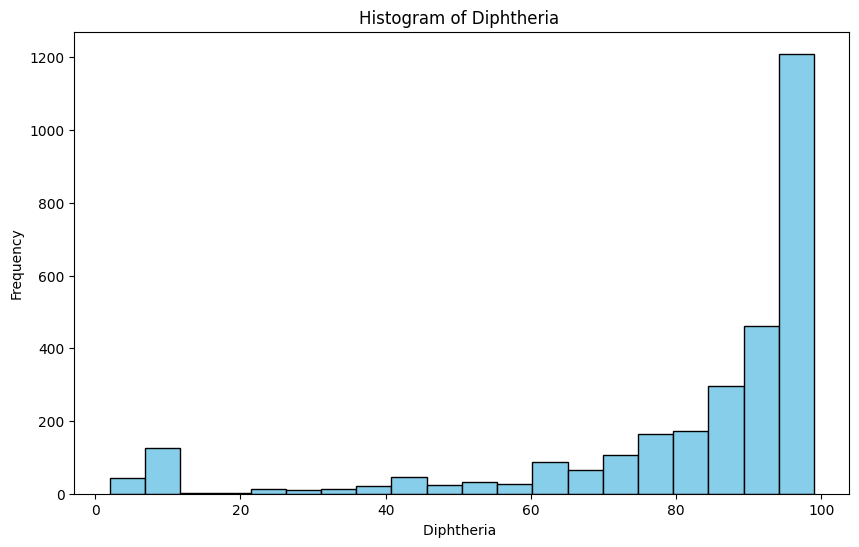

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Diphtheria '].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Diphtheria ')
plt.xlabel('Diphtheria ')
plt.ylabel('Frequency')
plt.show()

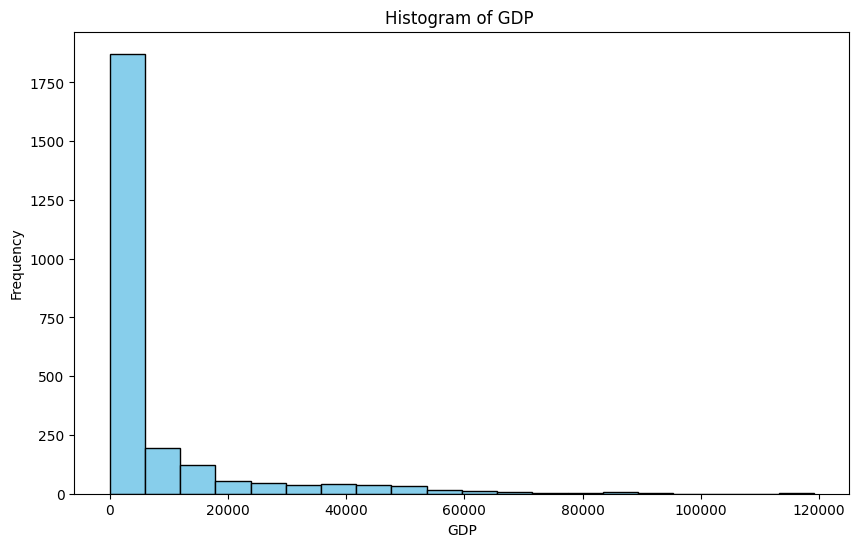

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['GDP'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of GDP ')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

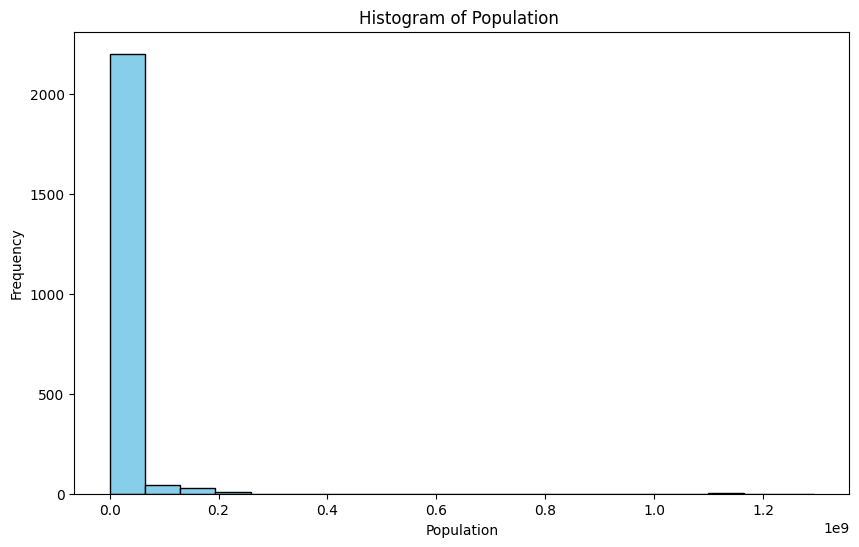

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Population'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Population ')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

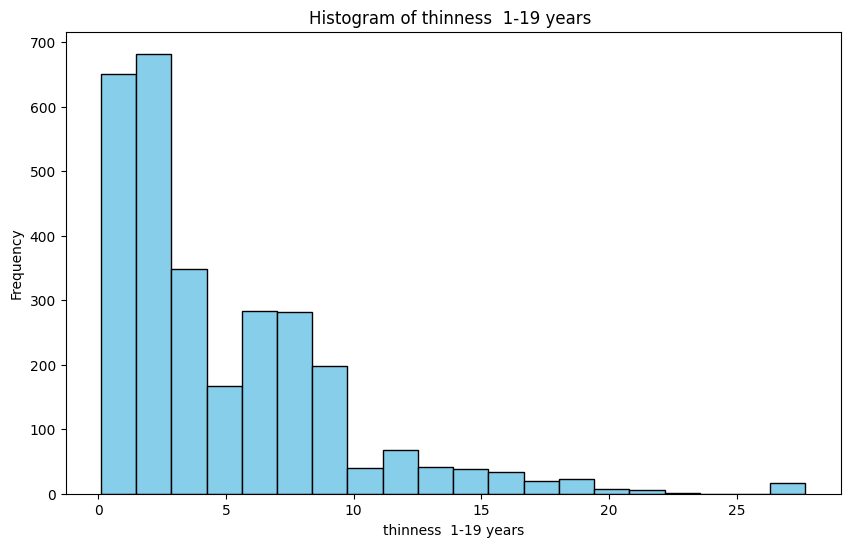

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life[' thinness  1-19 years'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of thinness  1-19 years ')
plt.xlabel('thinness  1-19 years')
plt.ylabel('Frequency')
plt.show()

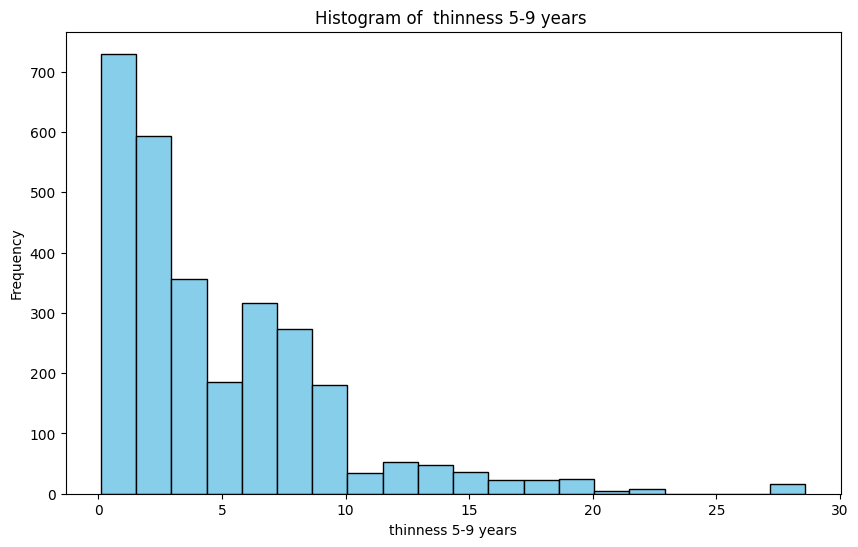

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life[' thinness 5-9 years'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of  thinness 5-9 years ')
plt.xlabel('thinness 5-9 years')
plt.ylabel('Frequency')
plt.show()

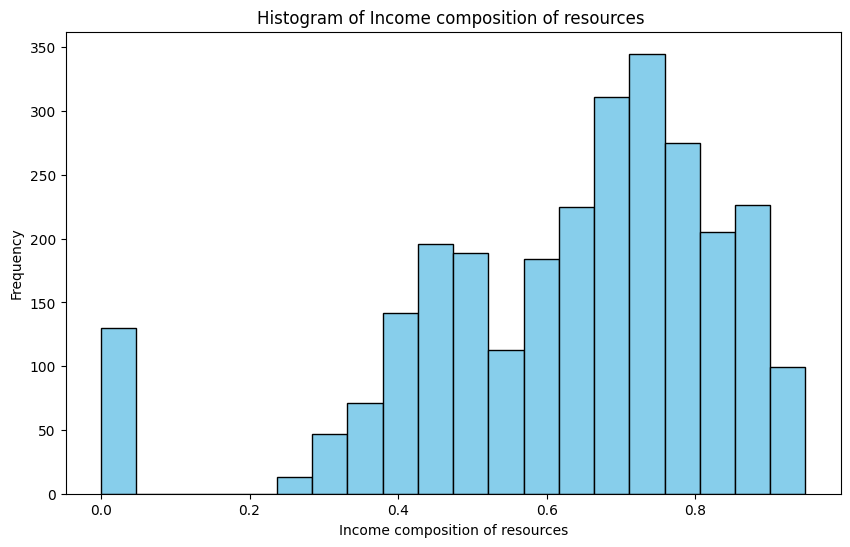

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Income composition of resources'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Income composition of resources ')
plt.xlabel('Income composition of resources')
plt.ylabel('Frequency')
plt.show()

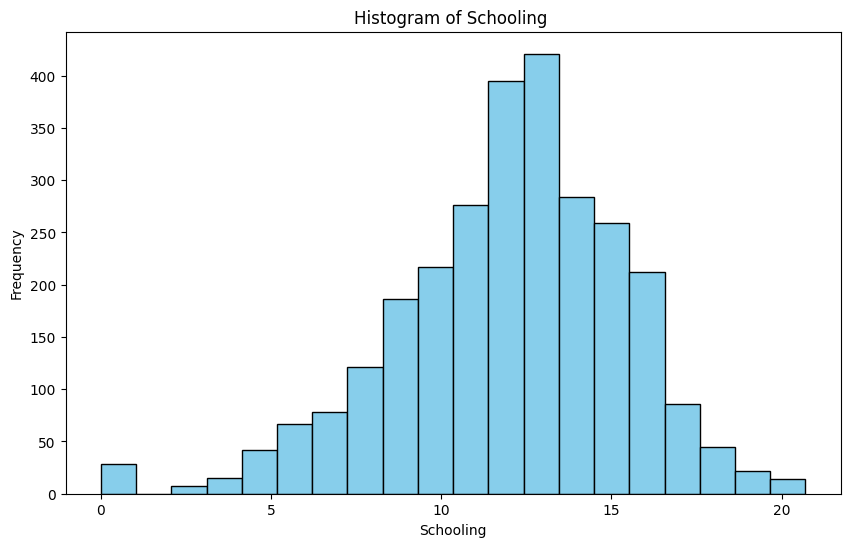

In [ ]:
# A histogram to show distribution of alcohol
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Schooling'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Schooling ')
plt.xlabel('Schooling')
plt.ylabel('Frequency')
plt.show()

In [ ]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#Using median to deal with missing values
columns = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources']

for column in columns:
  life[column]=life[column].fillna(life[column].median())

In [ ]:
#Using median to deal with missing values
columns = ['Total expenditure', 'Schooling' ]

for column in columns:
  life[column]=life[column].fillna(life[column].mean())

In [ ]:
life.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## **Data Analysis**

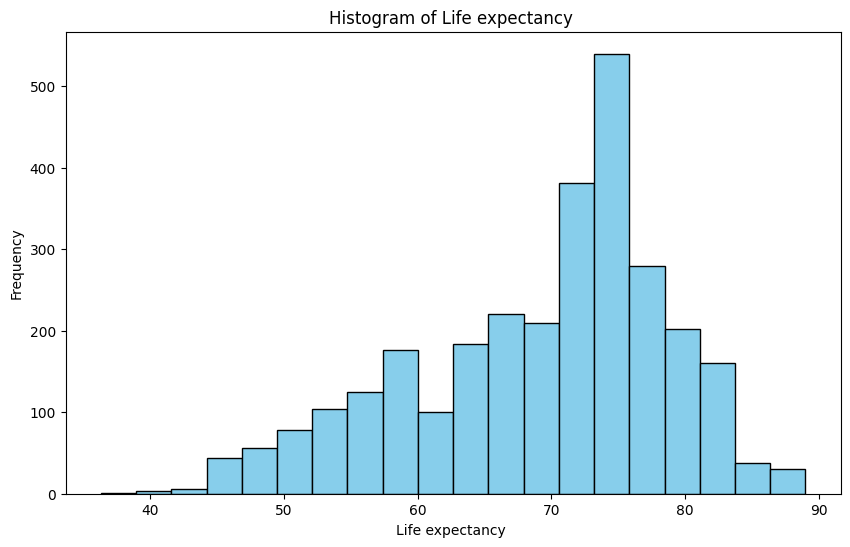

In [ ]:
# A histogram to show distribution of life expectancy
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(life['Life expectancy '].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Life expectancy ')
plt.xlabel('Life expectancy ')
plt.ylabel('Frequency')
plt.show()

### Most people are at the age 70-75

In [ ]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


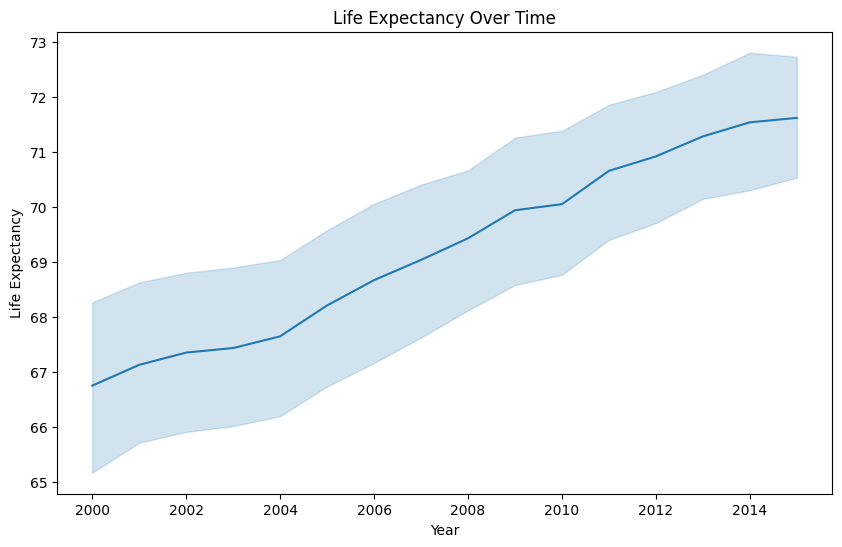

In [ ]:
# LIfe Expectancy trend over the years
#USing a line graph to show trend overtime
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy ', data=life)
plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

## **Encoding the status column**

In [ ]:
life['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015-01-01,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014-01-01,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013-01-01,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012-01-01,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011-01-01,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life.drop('Country', axis=1, inplace=True)

In [ ]:
life = pd.get_dummies(life, columns=['Status'], drop_first=True).astype(int)

In [ ]:
life.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,1420070400000000000,65,263,62,0,71,65,1154,19,83,...,8,65,0,584,33736494,17,17,0,10,1
1,1388534400000000000,59,271,64,0,73,62,492,18,86,...,8,62,0,612,327582,17,17,0,10,1
2,1356998400000000000,59,268,66,0,73,64,430,18,89,...,8,64,0,631,31731688,17,17,0,9,1
3,1325376000000000000,59,272,69,0,78,67,2787,17,93,...,8,67,0,669,3696958,17,18,0,9,1
4,1293840000000000000,59,275,71,0,7,68,3013,17,97,...,7,68,0,63,2978599,18,18,0,9,1


In [ ]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Year                             2938 non-null   int64
 1   Life expectancy                  2938 non-null   int64
 2   Adult Mortality                  2938 non-null   int64
 3   infant deaths                    2938 non-null   int64
 4   Alcohol                          2938 non-null   int64
 5   percentage expenditure           2938 non-null   int64
 6   Hepatitis B                      2938 non-null   int64
 7   Measles                          2938 non-null   int64
 8    BMI                             2938 non-null   int64
 9   under-five deaths                2938 non-null   int64
 10  Polio                            2938 non-null   int64
 11  Total expenditure                2938 non-null   int64
 12  Diphtheria                       2938 non-null  

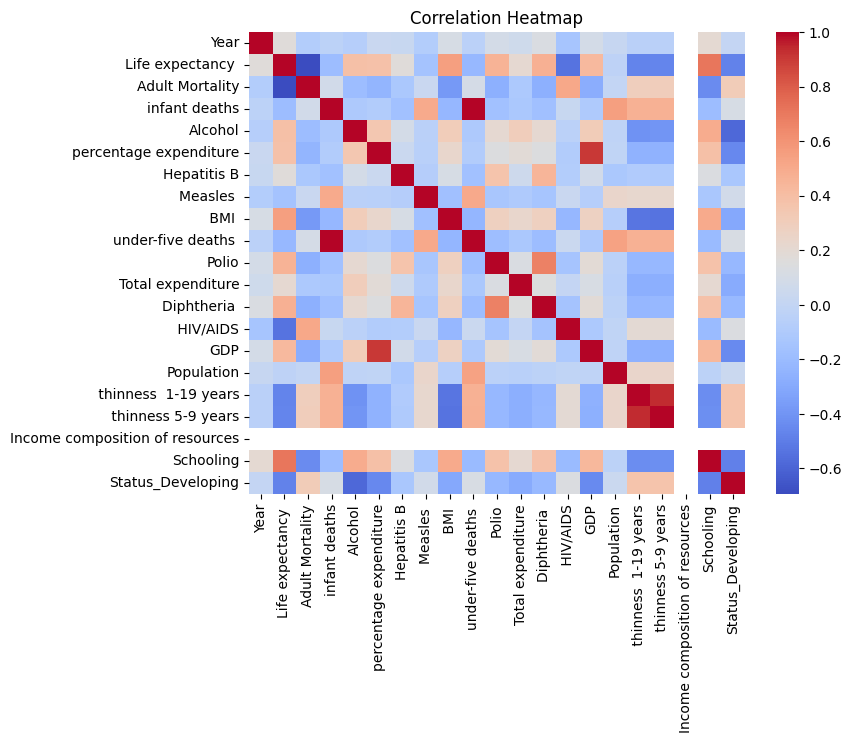

In [ ]:
# Select only numeric columns
numeric_columns = life.select_dtypes(include=['number']).columns
correlation_matrix = life[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Linear Models**

Linear Models are a set of methods for regression where the target (dependent variable) is estimated as a linear combination of the features (independent variables). The simplest linear model is Linear Regression, represented by the equation
𝑦
=
𝑚
𝑥
+
𝑐
y=mx+c, where:

y: Dependent variable (predicted value)
m: Slope, indicating the direction and steepness of the linear relationship
x: Independent variable (predictor)
c: y-intercept, showing the value when
𝑥
=
0
x=0.

### **Ordinary Least Squares (OLS)**

OLS is a common linear regression method that minimizes the residual sum of squares between observed and predicted values. For large datasets, singular value decomposition (SVD) can help simplify the computation.

### **Non-Negative Least Squares**

When coefficients need to be non-negative (e.g., in physical counts or prices), Non-Negative Least Squares can be applied by setting a positive parameter to True.

### **Overfitting and Regularization**

Overfitting occurs when a model performs well on training data but poorly on testing data, indicated by high variance. Regularization helps address overfitting by adding a penalty to large coefficients.

## **Modelling**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


## **Splitting the dataset**

In [ ]:
life.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [ ]:
X = life.drop(columns = ['Life expectancy '])
y = life['Life expectancy ']

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
456,1167609600000000000,126,0,5,345,96,0,25,0,98,4,98,0,3112,486438,8,8,0,11,1
462,978307200000000000,152,0,3,150,92,0,22,0,91,5,9,0,1268,443716,9,9,0,11,1
2172,1293840000000000000,143,0,10,0,99,0,44,0,99,7,99,0,1766,1386542,4,4,0,12,1
2667,1356998400000000000,13,3,1,594,98,16,59,3,98,7,98,0,4199,1114558,6,6,0,14,1
381,1009843200000000000,95,0,0,941,99,0,28,0,99,3,94,0,16846,1386542,6,6,0,13,1


In [ ]:
y_train.head

<bound method NDFrame.head of 456     72
462     73
2172    74
2667    74
381     74
        ..
1638    87
1095    56
1130    61
1294    79
860     59
Name: Life expectancy , Length: 2350, dtype: int64>

### **Linear Regression**

In [ ]:
linear = make_pipeline(StandardScaler(), LinearRegression())
r2_scores = cross_val_score(linear, X_train, y_train, cv=10, scoring='r2')
mean_r2 = r2_scores.mean()
print(mean_r2)


0.8020448943755337


In [ ]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
scores = cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_absolute_error').mean()*-1
print(scores)

3.314722900277048


### **Ridge**

In [ ]:


ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.0000009))
r2_scores = cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2')
mean_r2 = r2_scores.mean()
print(mean_r2)


0.8020448944014689


### **Lasso**

In [ ]:
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.07))
scores = cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2')
mean_r2 = r2_scores.mean()
print(mean_r2)


0.8020448944014689


In [ ]:
elasticnet = make_pipeline(StandardScaler(), ElasticNet(alpha=0.7, l1_ratio=0.00005))
scores = cross_val_score(elasticnet, X_train, y_train, cv=10, scoring='r2')
mean_r2 = r2_scores.mean()
print(mean_r2)

0.8020448944014689
